# 3-1

## スタック

積み上げた本をイメージ(FILO)


In [3]:
Max = 5
stack = [0] * Max
sp = 0  # stack pointer

print(stack)


def push(d):
    global sp
    if sp < Max:
        stack[sp] = d
        sp += 1
        print("data", d, "added")
    else:
        print("no more adding data")


def pop():
    global sp
    if sp > 0:
        sp -= 1
        data = stack[sp]
        stack[sp] = 0  # clear the popped element
        return data
    else:
        print("no pop data")
        return None

[0, 0, 0, 0, 0]


In [4]:
for i in range(6):
    push(i)
print(stack)
for i in range(6):
    print(sp)
    print(stack)
    d = pop()
    print("pop data", d)

data 0 added
data 1 added
data 2 added
data 3 added
data 4 added
no more adding data
[0, 1, 2, 3, 4]
5
[0, 1, 2, 3, 4]
pop data 4
4
[0, 1, 2, 3, 0]
pop data 3
3
[0, 1, 2, 0, 0]
pop data 2
2
[0, 1, 0, 0, 0]
pop data 1
1
[0, 0, 0, 0, 0]
pop data 0
0
[0, 0, 0, 0, 0]
no pop data
pop data None


# 3-2

## キュー

人間の列をイメージ(FIFO)


In [12]:
Max = 6
q = [0] * Max
head = 0
tail = 0


def enqueue(d):
    global tail
    nt = (tail + 1) % Max

    if nt == head:
        print("no more adding data")
    else:
        q[tail] = d
        tail = nt
        print("data", d, "added")


def dequeue():
    global head
    if head == tail:
        print("no dequeue data")
        return None
    else:
        d = q[head]
        q[head] = 0
        head = (head + 1) % Max
        return d

In [13]:
for i in range(6):
    enqueue(i)
print(q)
for i in range(6):
    d = dequeue()
    print("dequeue data", d)
print(q)

data 0 added
data 1 added
data 2 added
data 3 added
data 4 added
no more adding data
[0, 1, 2, 3, 4, 0]
dequeue data 0
dequeue data 1
dequeue data 2
dequeue data 3
dequeue data 4
no dequeue data
dequeue data None
[0, 0, 0, 0, 0, 0]


# 3-3

## 配列


In [10]:
MAX = 5
data = [None] * MAX  # ノードの値
pointer = [None] * MAX  # 次のノードの位置を示す値
head = 0


def add_list(d):
    n = -1  # 配列の位置を定義
    for i in range(MAX):
        if data[i] == None:
            n = i  # 先頭から初めて最初の空のノードの位置を決める
            break
    if (
        n == -1
    ):  # データを入れられる個数が今回は５個なのでそれを超えたら以下の動作をする。
        print("There are no vacancies of data")
        return False
    for i in range(MAX):
        if data[i] != None and pointer[i] == None:  # 最後尾のノードを示す
            pointer[i] = n
            break
    data[n] = d
    pointer[n] = None
    print("data", d, "added")
    return True


def del_list(d):
    global head
    n = -1  # 削除するノードの位置を定義
    for i in range(MAX):
        if data[i] == d:
            n = i  # 該当するノードを見つけたらその位置をnに代入
            break
    if n == -1:  # MAXー１まで該当するノードが見つからないなら以下の動作をする
        print("That data is not exist")
        return False
    if n != head:
        for i in range(MAX):
            if (
                pointer[i] == n
            ):  # ポインターの位置が消したいノードの場所を指している場合
                pointer[i] == pointer[n]  # そのポインタを次のポインタの値に変更
    else:  # 消したいノードが先頭なら
        head = pointer[n]  # 先頭を次のノードに変更
        if head == None:  # データが空になれば
            head = 0  # headは結局0
    data[n] = None  # 消すノードのデータの値とポインタを削除
    pointer[n] = None
    print("data", d, "deleted")
    return True


def put_list():
    p = head  # 先頭の値を取得
    while True:
        print(data[p], end="→")  # ノードの値を表示
        if pointer[p] == None:  # 末尾ノードなら動作を終える
            print("EOF")  # End Of Fileの略
            break
        p = pointer[p]  # 終わらないなら次のノードへ移動


print(data)

[None, None, None, None, None]


### 計算量:O(n)

最後に削除した、または追加したノードの位置を保持する変数などを用意すれば時短にできる可能性がある


In [9]:
for i in range(10, 70, 10):
    add_list(i)
del_list(10)
put_list()
print(data)

data 10 added
data 20 added
data 30 added
data 40 added
data 50 added
There are no vacancies of data
data 10 deleted
20→30→40→50→EOF
[None, 20, 30, 40, 50]


# 3-4

## 木構造


## 木構造の説明

- 木の頂点ー根
- 木の末端ー葉
- ノードにぶら下がるノードー子
- ノードにぶら下がる相手ー親


In [3]:
LEFT = 0  # 左の子ノード番号(x=0)
RIGHT = 1  # 右の子ノード番号(x=1)
DATA = 2  # ノードの値(x=2)
node = [  # y軸がノードの番号、x軸が左から左の子、右の子、ノードの値
    [1, 2, 10],
    [3, 4, 20],
    [5, None, 30],
    [None, None, 40],
    [6, 7, 50],
    [None, None, 60],
    [None, None, 70],
    [None, None, 80],
]
MAX = len(node)

print("指定の番号のノードを調べます")
print("何も入力せずにEnterを押すと終了します")

while True:
    s = input("number=")
    if s == "":
        break
    n = int(s)
    if 0 <= n and n < MAX:  # 入力された番号がノードの範囲内なら
        print("node{}の値は{}".format(n, node[n][DATA]))
        le = node[n][LEFT]
        if le != None:
            print("左の子は" + str(node[le][DATA]))
        else:
            print("左の子は存在しません")
        ri = node[n][RIGHT]
        if ri != None:
            print("右の子は" + str(node[ri][DATA]))
        else:
            print("右の子は存在しません")
    else:
        print("0から" + str(MAX - 1) + "の範囲で入力してください")

指定の番号のノードを調べます
何も入力せずにEnterを押すと終了します
node1の値は20
左の子は40
右の子は50
node2の値は30
左の子は60
右の子は存在しません
node3の値は40
左の子は存在しません
右の子は存在しません


ValueError: invalid literal for int() with base 10: 'x'

In [5]:
LEFT = 0  # 左の子ノード番号(x=0)
RIGHT = 1  # 右の子ノード番号(x=1)
DATA = 2  # ノードの値(x=2)
node = [  # y軸がノードの番号、x軸が左から左の子、右の子、ノードの値
    [1, 2, 10],
    [3, 4, 20],
    [5, None, 30],
    [None, None, 40],
    [6, 7, 50],
    [None, None, 60],
    [None, None, 70],
    [None, None, 80],
]
MAX = len(node)

print("指定の番号のノードを調べます")
print("何も入力せずにEnterを押すと終了します")

while True:
    s = input("number=")
    if s == "":
        break
    try:
        n = int(s)
    except:
        print("整数を入力してください")
        continue
    if 0 <= n and n < MAX:
        print("node{}の値は{}".format(n, node[n][DATA]))
        le = node[n][LEFT]
        if le != None:
            print("左の子は" + str(node[le][DATA]))
        else:
            print("左の子は存在しません")
        ri = node[n][RIGHT]
        if ri != None:
            print("右の子は" + str(node[ri][DATA]))
        else:
            print("右の子は存在しません")
    else:
        print("0から" + str(MAX - 1) + "の範囲で入力してください")

指定の番号のノードを調べます
何も入力せずにEnterを押すと終了します
node1の値は20
左の子は40
右の子は50
node2の値は30
左の子は60
右の子は存在しません
node3の値は40
左の子は存在しません
右の子は存在しません
node4の値は50
左の子は70
右の子は80
整数を入力してください
整数を入力してください
0から7の範囲で入力してください


# 3-5

## グラフ


**グラフ**とは複数のノードが線で結ばれたデータ構造のこと

- グラフの例ー路線図
- 無向グラフ、有向グラフ


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

## 無向グラフ


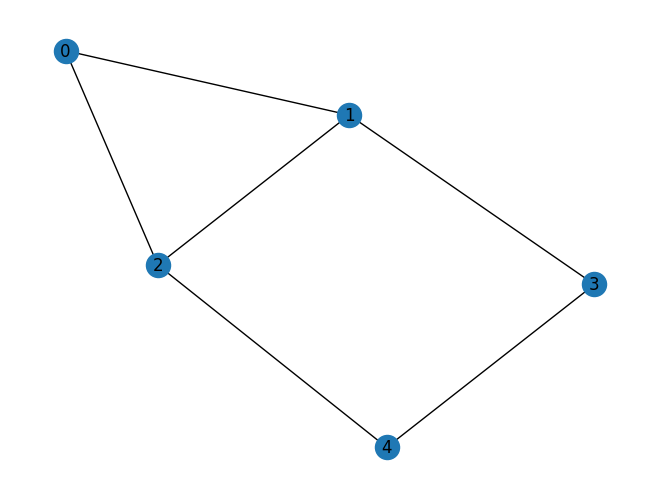

In [26]:
G1 = nx.Graph()

G1.add_node(0)
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)

G1.add_edge(0, 1)
G1.add_edge(0, 2)
G1.add_edge(1, 2)
G1.add_edge(1, 3)
G1.add_edge(2, 4)
G1.add_edge(3, 4)

nx.draw(G1, with_labels=True)

上記のグラフを二次元配列で定義すると


In [29]:
G1 = [  # 結ばれている場合は１、結ばれていない場合は０s
    # 0  1  2  3  4
    [0, 1, 1, 0, 0],  # 0
    [1, 0, 1, 1, 0],  # 1
    [1, 1, 0, 0, 1],  # 2
    [0, 1, 0, 0, 1],  # 3
    [0, 0, 1, 1, 0],  # 4
]
# グラフは要素[0][0]と最後尾の要素[y][x]で線対称

## 有向グラフ


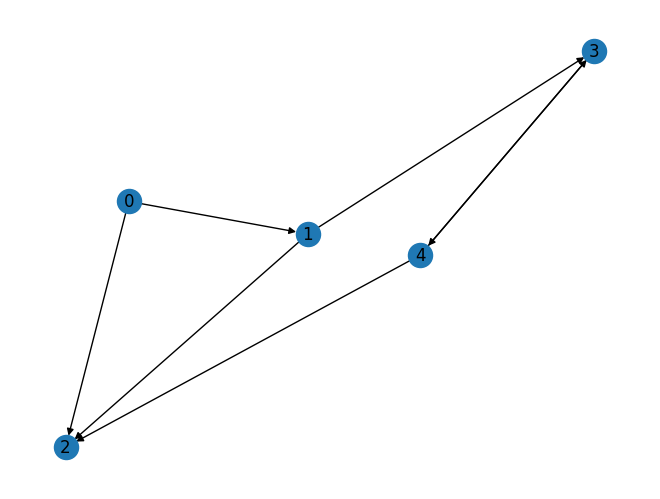

In [39]:
G2 = nx.DiGraph()

G2.add_node(0)
G2.add_node(1)
G2.add_node(2)
G2.add_node(3)
G2.add_node(4)

G2.add_edge(0, 1)
G2.add_edge(0, 2)
G2.add_edge(1, 2)
G2.add_edge(1, 3)
G2.add_edge(3, 4)
G2.add_edge(4, 2)
G2.add_edge(4, 3)

nx.draw(G2, with_labels=True)

In [2]:
G2 = [  # 結ばれている場合は１、結ばれていない場合は０
    # 0  1  2  3  4
    [0, 1, 1, 0, 0],  # 0
    [0, 0, 1, 1, 0],  # 1
    [0, 0, 0, 0, 0],  # 2
    [0, 0, 0, 0, 1],  # 3
    [0, 0, 1, 1, 0],  # 4
]  # 今回は線対称ではない

# 0->1には行けるが1->0には行けないので[0][1]は１で[1][0]は０
# 以上の二次元配列を隣接行列（n x n）という

隣接行列で木を表す


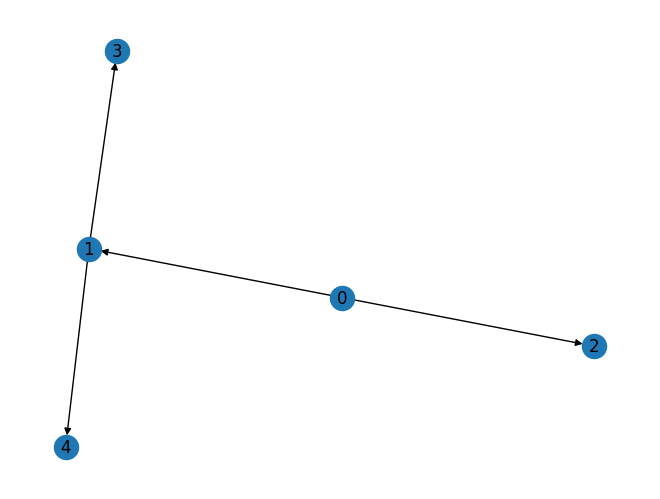

In [55]:
tree = nx.DiGraph()

tree.add_node(0)
tree.add_node(1)
tree.add_node(2)
tree.add_node(3)
tree.add_node(4)

tree.add_edge(0, 1)
tree.add_edge(0, 2)
tree.add_edge(1, 3)
tree.add_edge(1, 4)

nx.draw(tree, with_labels=True)

In [56]:
tree = [
    # 0  1  2  3  4
    [0, 1, 1, 0, 0],  # 0
    [1, 0, 0, 1, 1],  # 1
    [1, 0, 0, 0, 0],  # 2
    [0, 1, 0, 0, 0],  # 3
    [0, 1, 0, 0, 0],  # 4
]  # 木構造は線対称

G1 のノード間のつながりを出力


In [57]:
node = ["{0}", "{1}", "{2}", "{3}", "{4}"]

for y in range(5):
    for x in range(y, 5):
        if G1[y][x] == 1 and G1[x][y] == 1:
            print(node[y], "<->", node[x])

{0} <-> {1}
{0} <-> {2}
{1} <-> {2}
{1} <-> {3}
{2} <-> {4}
{3} <-> {4}


G2 のノードのつながり


In [ ]:
node = ["{0}", "{1}", "{2}", "{3}", "{4}"]
arrow = ["", "-->", "<--", "<->"]

for y in range(5):
    for x in range(y, 5):
        e1 = G2[y][x]
        e2 = G2[x][y]
        a = e1 + e2 * 2  # aが０なら線はなし、１なら一方向、２なら逆方向、３なら両方向
        if a > 0:
            print(node[y], arrow[a], node[x])

{0} --> {1}
{0} --> {2}
{1} --> {2}
{1} --> {3}
{2} <-- {4}
{3} <-> {4}


# 3-1

a:3,b:1


# 3-2

① 最初
②FIFO


# 3-3

① A:片方向リスト
② D:双方向循環リスト


# 3-4

① ３
②None
③ ６


# 3-5

C


# Extra Lesson 3-1


In [1]:
import queue

In [ ]:
MAX = 10

print("queue")
q = queue.Queue()
for i in range(MAX):
    q.put(i)
for i in range(MAX):
    print(q.get(), end="→")
print("\n")
print("stack")
s = queue.LifoQueue()
for i in range(MAX):
    s.put(i)
for i in range(MAX):
    print(s.get(), end="→")

queue
0→1→2→3→4→5→6→7→8→9→

stack
9→8→7→6→5→4→3→2→1→0→

# Extra Lesson 3-2


In [4]:
f = open("text.txt", "w", encoding="utf-8")
for i in range(1, 11):
    data = str(2**i) + "\n"
    f.write(data)
f.close()

In [15]:
f = open("text.txt", "r", encoding="utf-8")
r = f.read()
# print(r)
f.close()
s = r.split("\n")
# print(s)
n = len(s)
# print(n)
data = [0] * n
print(data)
for i in range(n):
    if s[i] != "":
        data[i] = int(s[i])
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 0]


In [ ]:
a